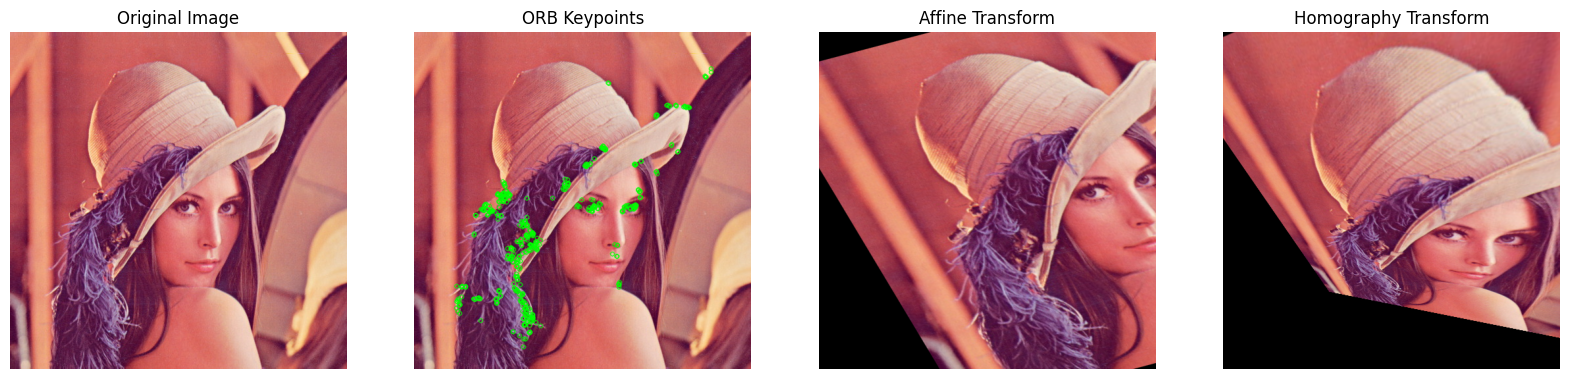

In [1]:
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt

# URL of the new image
image_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"

# Download the image
urllib.request.urlretrieve(image_url, "sample_image.jpg")
# Read the image
image = cv2.imread("sample_image.jpg", cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Feature detection using ORB
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(image, None)
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)

# Affine transformation
rows, cols, ch = image.shape
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M_affine = cv2.getAffineTransform(pts1, pts2)
affine_transformed_image = cv2.warpAffine(image, M_affine, (cols, rows))

# Homography transformation
pts1 = np.float32([[50, 50], [200, 50], [50, 200], [200, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250], [250, 250]])
M_homography, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)
homography_transformed_image = cv2.warpPerspective(image, M_homography, (cols, rows))

# Display the images
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("ORB Keypoints")
plt.imshow(image_with_keypoints)
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Affine Transform")
plt.imshow(affine_transformed_image)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Homography Transform")
plt.imshow(homography_transformed_image)
plt.axis('off')

plt.show()


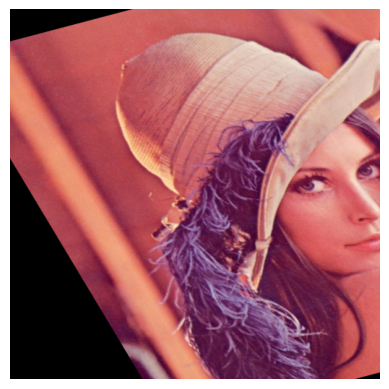

In [2]:

# Affine transformation
rows, cols, ch = image.shape
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M_affine = cv2.getAffineTransform(pts1, pts2)
affine_transformed_image = cv2.warpAffine(image, M_affine, (cols, rows))

plt.imshow(affine_transformed_image)
plt.axis('off')
plt.show()


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display

# URL of the new image
image_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"

# Download the image
urllib.request.urlretrieve(image_url, "sample_image.jpg")

# Read the image
image = cv2.imread("sample_image.jpg", cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to plot image and select points
pts1 = []
pts2 = []

def select_points(event, x, y, flags, param):
    global pts1, pts2
    if event == cv2.EVENT_LBUTTONDOWN:
        if len(pts1) < 3:
            pts1.append((x, y))
            cv2.circle(image, (x, y), 5, (255, 0, 0), -1)
            cv2.imshow('Select Points for Affine Transform', image)
        elif len(pts2) < 3:
            pts2.append((x, y))
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
            cv2.imshow('Select Points for Affine Transform', image)

cv2.imshow('Select Points for Affine Transform', image)
cv2.setMouseCallback('Select Points for Affine Transform', select_points)
cv2.waitKey(0)
cv2.destroyAllWindows()

pts1 = np.float32(pts1)
pts2 = np.float32(pts2)

def affine_transform(pts1, pts2):
    rows, cols, ch = image.shape
    M_affine = cv2.getAffineTransform(pts1, pts2)
    affine_transformed_image = cv2.warpAffine(image, M_affine, (cols, rows))

    plt.figure(figsize=(10, 5))
    plt.imshow(affine_transformed_image)
    plt.axis('off')
    plt.show()

interactive_plot = interactive(affine_transform, pts1=widgets.fixed(pts1), pts2=widgets.fixed(pts2))
display(interactive_plot)


interactive(children=(Output(),), _dom_classes=('widget-interact',))

In [ ]:
# TODO: would be nice to get the scrool bars for the matrix values that can be changed and display interactive image transformation